In [1]:
set.seed(1)
post.a <- function(mu,sd,y){
    ldens <- 0
    for (i in 1:length(y)) 
        ldens <- ldens + log(dnorm(y[i],mu,sd))
    ldens  <- ldens +log(1/sd^2)
    ldens
}
post.b <- function(mu,sd,y){
    ldens <- 0
    for (i in 1:length(y)) 
        ldens <- ldens + log(pnorm(y[i]+0.5,mu,sd) - pnorm(y[i]-0.5,mu,sd))
    ldens  <- ldens +log(1/sd^2)
    ldens
}
summ <- function(x){
    c(mean(x),sqrt(var(x)),quantile(x, c(.025,.25,.5,.75,.975)))
}

$ p(\mu,\sigma^2|y)\propto p(\mu|\sigma^2,y)p(\sigma^2|y)$

$ \mu|\sigma^2,y \sim \mathcal{N}(\bar y,\frac{\sigma^2}{n})$

$ \sigma^2|y\sim \text{Inv-}\chi^2(n-1,s^2)$

To obtain a simulation draw $\theta$ from the $\text{Inv-}\chi^2(\mathcal{v}, s^2)$ distribution,
first draw X from the $\chi_\mathcal{v}^2$ distribution and then let $\theta = \mathcal{v}s^2/X$.

                              2.5%        25%       50%       75%     97.5%
[1,] 10.395431 0.7576049 8.8912034 10.0210041 10.397777 10.788130 11.857449
[2,]  1.410524 0.7424470 0.6952815  0.9601507  1.233706  1.603679  3.303106


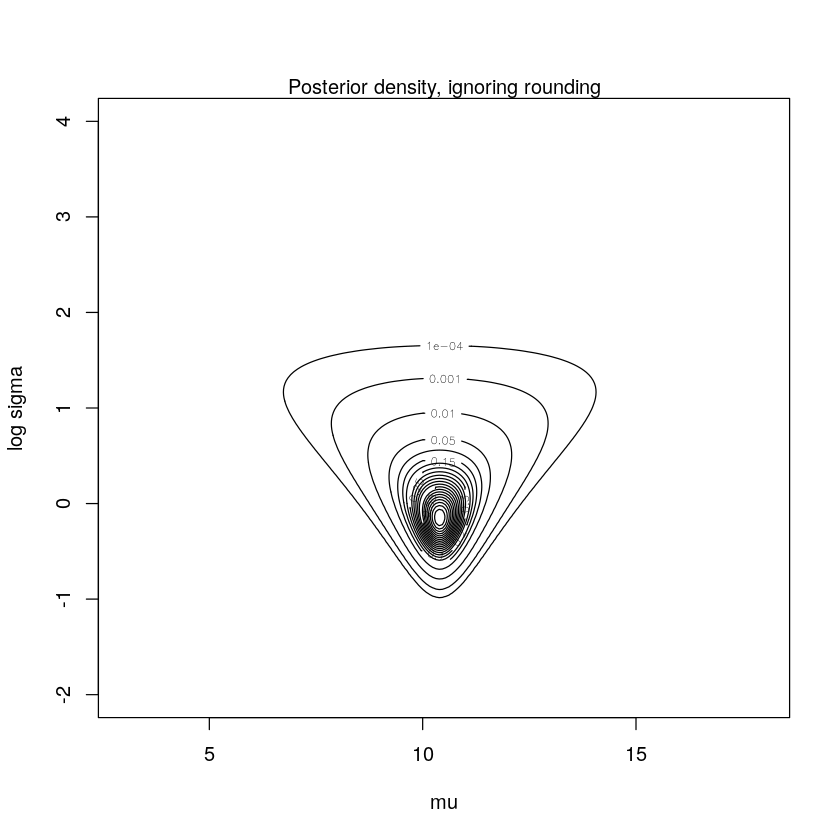

In [2]:
nsim <- 2000
y <- c(10,10,12,11,9)
n <- length(y)
ybar <- mean(y)
s2 <- sum((y-mean(y))^2)/(n-1)
mugrid <- seq(3,18,length=200)
logsdgrid <- seq(-2,4,length=200)

contours <- c(.0001,.001,.01,seq(.05,.95,.05))
logdens <- outer(mugrid, exp(logsdgrid), post.a, y)
dens <- exp(logdens - max(logdens))

contour (mugrid, logsdgrid, dens, levels=contours,
         xlab="mu", ylab="log sigma",  cex=2)
mtext ("Posterior density, ignoring rounding", 3)

sd <- sqrt((n-1)*s2/rchisq(nsim,4)) 
mu <- rnorm(nsim,ybar,sd/sqrt(n))
print (rbind (summ(mu),summ(sd)))

                               2.5%        25%        50%       75%     97.5%
[1,] 10.4279774 0.4904840 9.4824121 10.1608040 10.4623116 10.688442 11.368719
[2,]  0.9935031 0.3709571 0.5099886  0.7323053  0.9320659  1.151083  1.921808


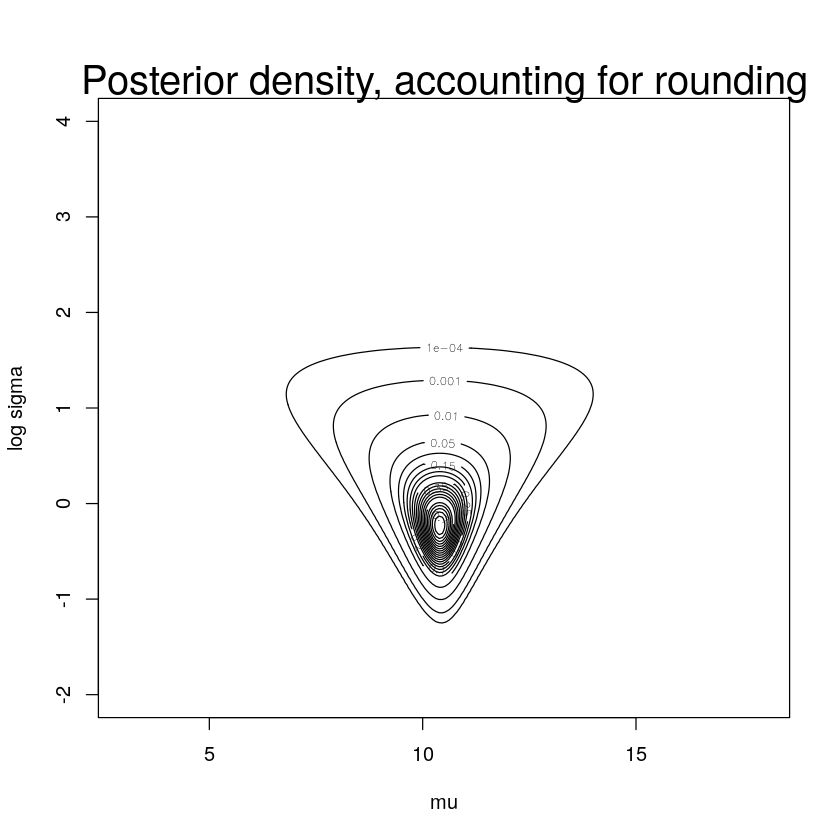

In [3]:
logdens <- outer (mugrid, exp(logsdgrid), post.b, y)
dens <- exp(logdens - max(logdens))

contour (mugrid, logsdgrid, dens, levels=contours,
         xlab="mu", ylab="log sigma", cex=2)
mtext ("Posterior density, accounting for rounding",
cex=2, 3)

dens.mu <- apply(dens,1,sum)
muindex <- sample (1:length(mugrid), nsim, replace=T,
prob=dens.mu)
mu <- mugrid[muindex]
sd <- rep (NA,nsim)
for (i in (1:nsim)) 
    sd[i] <- exp (sample(logsdgrid, 1, prob=dens[muindex[i],]))
print (rbind (summ(mu),summ(sd)))

In [4]:
z <- matrix (NA, nsim, length(y))
for (i in 1:length(y)){
    lower <- pnorm (y[i]-.5, mu, sd)
    upper <- pnorm (y[i]+.5, mu, sd)
    z[,i] <- qnorm (lower + runif(nsim)*(upper-lower), mu, sd)
}
mean ((z[,1]-z[,2])^2)

[1] 0.1563692

# References
* [the-log-sum-exp-trick-in-machine-learning/](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)